In [64]:
# Básicos
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime

# Graficas
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocesamiento
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Selección del modelo
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

# Modelos
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix


from sklearn import utils
from sklearn import preprocessing

# Habilitar la recarga de archivos modificados
%load_ext autoreload
%autoreload 2

# Graficas en linea
%matplotlib inline

#Pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Pickle
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,CUSTOMER_ID,CEDI,canal_rgm,sub_canal_comercial,tamano_rtm,VENTAS,POT_TOTAL,CREC_POT,12_meses,12_meses_AA,tendencia,respeto,autos_promedio,ESTADO_EDFs,EDFs actuales,PUERTAS_EDF,Cooler
0,500001086,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,GRANDE,482.0724,2.666667,607.999033,7730.162208,9068.135000,-0.147547,1.0,476,2,2,4,0
1,500001747,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,EXT-GDE,1091.5015,3.000000,1252.760200,13127.281890,12093.020300,0.085525,1.0,163,2,4,6,1
2,500002113,3907,TRADICIONAL,Estanquillos / kioscos,GRANDE,577.8798,3.000000,894.293567,7347.602525,6654.430421,0.104167,1.0,2399,2,3,3,1
3,500002345,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,EXT-GDE,729.8574,3.000000,1130.200233,11477.995600,12472.880500,-0.079764,1.0,171,2,3,5,0
4,500004409,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,EXT-GDE,574.5307,3.000000,858.599267,7941.824498,8892.840800,-0.106942,1.0,176,2,2,4,0


In [4]:
df.describe()

,CUSTOMER_ID,CEDI,VENTAS,POT_TOTAL,CREC_POT,12_meses,12_meses_AA,tendencia,respeto,autos_promedio,ESTADO_EDFs,EDFs actuales,PUERTAS_EDF,Cooler
count,1.284200e+04,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12795.000000,12795.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000,12842.000000
mean,5.014355e+08,3514.070394,447.474982,2.378446,549.304742,5971.912752,5847.841730,3.144777,0.970410,449.462934,2.003348,2.146940,3.549136,0.503348
std,3.167595e+06,350.220694,363.226284,0.446041,249.031514,5051.773986,4829.801885,273.611124,0.139564,462.104770,0.205988,1.225261,1.819293,0.500008
min,5.000001e+08,3001.000000,0.634000,1.666667,187.905800,345.134623,0.140900,-0.668345,0.000000,151.000000,1.000000,1.000000,1.000000,0.000000
25%,5.002212e+08,3207.000000,228.189725,2.000000,396.013675,3165.332451,3135.473850,-0.084576,1.000000,208.000000,2.000000,1.000000,2.000000,0.000000
50%,5.003696e+08,3507.000000,371.640300,2.333333,484.399183,5020.259029,4905.696700,0.005852,1.000000,294.000000,2.000000,2.000000,3.000000,1.000000
75%,5.004834e+08,3819.000000,569.988100,2.666667,618.565917,7484.068326,7355.143100,0.108513,1.000000,450.000000,2.000000,3.000000,5.000000,1.000000
max,5.108364e+08,3953.000000,12228.006700,3.000000,6202.323167,257018.995200,216900.532900,30187.730930,1.000000,4474.000000,22.000000,17.000000,28.000000,1.000000


In [5]:
df.isna().sum()

CUSTOMER_ID             0
CEDI                    0
canal_rgm               0
sub_canal_comercial     0
tamano_rtm              0
VENTAS                  0
POT_TOTAL               0
CREC_POT                0
12_meses                0
12_meses_AA            47
tendencia              47
respeto                 0
autos_promedio          0
ESTADO_EDFs             0
EDFs actuales           0
PUERTAS_EDF             0
Cooler                  0
dtype: int64

In [6]:
df = df.dropna(subset=['12_meses', '12_meses_AA'])

In [7]:
df.isna().sum()

CUSTOMER_ID            0
CEDI                   0
canal_rgm              0
sub_canal_comercial    0
tamano_rtm             0
VENTAS                 0
POT_TOTAL              0
CREC_POT               0
12_meses               0
12_meses_AA            0
tendencia              0
respeto                0
autos_promedio         0
ESTADO_EDFs            0
EDFs actuales          0
PUERTAS_EDF            0
Cooler                 0
dtype: int64

In [8]:
df.ESTADO_EDFs.unique()

array([ 2,  8,  1, 22], dtype=int64)

In [9]:
df[['SC_Abarrotes / Almacenes / Bodegas / Víveres','SC_Estanquillos / kioscos']] = pd.get_dummies(df.sub_canal_comercial, prefix= 'SC', dtype=float)
df[['GRANDE', 'EXT-GDE', 'MEDIANO', 'MICRO', 'CHICO']] = pd.get_dummies(df.tamano_rtm, dtype=float)
df[['Estado_EDF_2','Estado_EDF_8', 'Estado_EDF_1', 'Estado_EDF_22']] = pd.get_dummies(df.ESTADO_EDFs, prefix= 'Estado_EDF', dtype=float)

In [10]:
df.head()

,CUSTOMER_ID,CEDI,canal_rgm,sub_canal_comercial,tamano_rtm,VENTAS,POT_TOTAL,CREC_POT,12_meses,12_meses_AA,...,SC_Estanquillos / kioscos,GRANDE,EXT-GDE,MEDIANO,MICRO,CHICO,Estado_EDF_2,Estado_EDF_8,Estado_EDF_1,Estado_EDF_22
0,500001086,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,GRANDE,482.0724,2.666667,607.999033,7730.162208,9068.135000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,500001747,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,EXT-GDE,1091.5015,3.000000,1252.760200,13127.281890,12093.020300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,500002113,3907,TRADICIONAL,Estanquillos / kioscos,GRANDE,577.8798,3.000000,894.293567,7347.602525,6654.430421,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,500002345,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,EXT-GDE,729.8574,3.000000,1130.200233,11477.995600,12472.880500,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,500004409,3907,TRADICIONAL,Abarrotes / Almacenes / Bodegas / Víveres,EXT-GDE,574.5307,3.000000,858.599267,7941.824498,8892.840800,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df.isna().sum()

CUSTOMER_ID                                     0
CEDI                                            0
canal_rgm                                       0
sub_canal_comercial                             0
tamano_rtm                                      0
VENTAS                                          0
POT_TOTAL                                       0
CREC_POT                                        0
12_meses                                        0
12_meses_AA                                     0
tendencia                                       0
respeto                                         0
autos_promedio                                  0
ESTADO_EDFs                                     0
EDFs actuales                                   0
PUERTAS_EDF                                     0
Cooler                                          0
SC_Abarrotes / Almacenes / Bodegas / Víveres    0
SC_Estanquillos / kioscos                       0
GRANDE                                          0


In [12]:
df = df.drop(columns=['CEDI', 'canal_rgm', 'sub_canal_comercial', 'tamano_rtm', 'ESTADO_EDFs'])

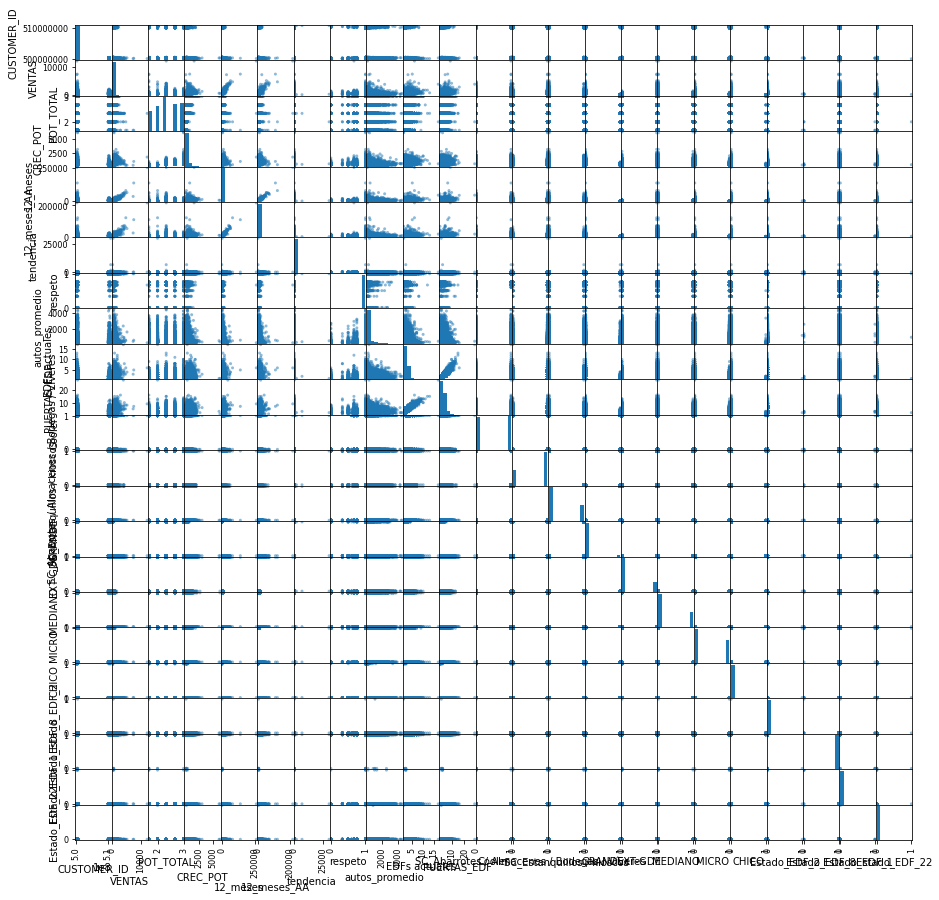

In [13]:
plot= pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(15,15));

In [14]:
df.isna().sum()

CUSTOMER_ID                                     0
VENTAS                                          0
POT_TOTAL                                       0
CREC_POT                                        0
12_meses                                        0
12_meses_AA                                     0
tendencia                                       0
respeto                                         0
autos_promedio                                  0
EDFs actuales                                   0
PUERTAS_EDF                                     0
Cooler                                          0
SC_Abarrotes / Almacenes / Bodegas / Víveres    0
SC_Estanquillos / kioscos                       0
GRANDE                                          0
EXT-GDE                                         0
MEDIANO                                         0
MICRO                                           0
CHICO                                           0
Estado_EDF_2                                    0


In [15]:
y= df["Cooler"]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: Cooler, dtype: int64

In [16]:
df = df.drop(columns=['Cooler'])

X = df[["SC_Abarrotes / Almacenes / Bodegas / Víveres", "SC_Estanquillos / kioscos", "GRANDE", "EXT-GDE", "MEDIANO", "MICRO", "CHICO", "Estado_EDF_2", "Estado_EDF_8", "Estado_EDF_1", "Estado_EDF_22"]]
X.head()

In [17]:
X = df
X.head()

,CUSTOMER_ID,VENTAS,POT_TOTAL,CREC_POT,12_meses,12_meses_AA,tendencia,respeto,autos_promedio,EDFs actuales,...,SC_Estanquillos / kioscos,GRANDE,EXT-GDE,MEDIANO,MICRO,CHICO,Estado_EDF_2,Estado_EDF_8,Estado_EDF_1,Estado_EDF_22
0,500001086,482.0724,2.666667,607.999033,7730.162208,9068.135000,-0.147547,1.0,476,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,500001747,1091.5015,3.000000,1252.760200,13127.281890,12093.020300,0.085525,1.0,163,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,500002113,577.8798,3.000000,894.293567,7347.602525,6654.430421,0.104167,1.0,2399,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,500002345,729.8574,3.000000,1130.200233,11477.995600,12472.880500,-0.079764,1.0,171,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,500004409,574.5307,3.000000,858.599267,7941.824498,8892.840800,-0.106942,1.0,176,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12795 entries, 0 to 12840
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   CUSTOMER_ID                                   12795 non-null  int64  
 1   VENTAS                                        12795 non-null  float64
 2   POT_TOTAL                                     12795 non-null  float64
 3   CREC_POT                                      12795 non-null  float64
 4   12_meses                                      12795 non-null  float64
 5   12_meses_AA                                   12795 non-null  float64
 6   tendencia                                     12795 non-null  float64
 7   respeto                                       12795 non-null  float64
 8   autos_promedio                                12795 non-null  int64  
 9   EDFs actuales                                 12795 non-null 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [20]:
model_lr = LinearRegression()
regressor_lr= model_lr.fit(X_train, y_train)

In [21]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CUSTOMER_ID', 'VENTAS', 'POT_TOTAL', 'CREC_POT', '12_meses',
        '12_meses_AA', 'tendencia', 'respeto', 'autos_promedio',
        'EDFs actuales', 'PUERTAS_EDF',
        'SC_Abarrotes / Almacenes / Bodegas / Víveres',
        'SC_Estanquillos / kioscos', 'GRANDE', 'EXT-GDE', 'MEDIANO',
        'MICRO', 'CHICO', 'Estado_EDF_2', 'Estado_EDF_8', 'Estado_EDF_1',
        'Estado_EDF_22'], dtype=object),
 'n_features_in_': 22,
 'coef_': array([ 2.05261448e-09,  1.44239828e-04, -2.41172638e-02,  2.88110954e-05,
         1.54849897e-04, -1.78783036e-04, -3.30906582e-06,  5.05888522e-01,
         5.06123633e-06,  2.04365574e-02, -2.26669866e-02, -1.86173579e-03,
         1.86173579e-03, -1.56950689e-01,  2.18089897e-01,  1.44673021e-01,
        -2.32860367e-03, -2.03483626e-01,  0.00000000e+00,  1.42004240e-01,
         1.41772633e-01, -2.83776874e-01]),
 '

In [22]:
model_lr.coef_

array([ 2.05261448e-09,  1.44239828e-04, -2.41172638e-02,  2.88110954e-05,
        1.54849897e-04, -1.78783036e-04, -3.30906582e-06,  5.05888522e-01,
        5.06123633e-06,  2.04365574e-02, -2.26669866e-02, -1.86173579e-03,
        1.86173579e-03, -1.56950689e-01,  2.18089897e-01,  1.44673021e-01,
       -2.32860367e-03, -2.03483626e-01,  0.00000000e+00,  1.42004240e-01,
        1.41772633e-01, -2.83776874e-01])

In [23]:
yhat=regressor_lr.predict(X_test)

In [24]:
r2_score(y_test, yhat)

0.3219300163474348

In [25]:
parameters={"n_neighbors":range(1,100)}
knn_model= KNeighborsClassifier()
gs= GridSearchCV(knn_model, parameters, cv=5, n_jobs=1, verbose=1, return_train_score=True)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': range(1, 100)}, return_train_score=True,
             verbose=1)

In [26]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [27]:
gs.score(X_test, y_test)

0.7095967489840576

In [28]:
model= RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

print("The accuracy is", model.score(X_test, y_test))

The accuracy is 0.9990622069396686


C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


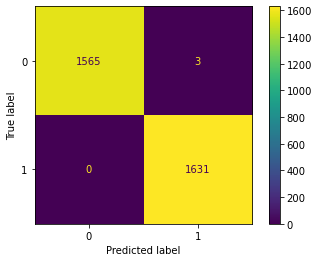

In [29]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [30]:
y_hat= model.predict(X_test)

In [31]:
precision_score(y_test, y_hat), recall_score(y_test, y_hat)

(0.9981640146878825, 1.0)

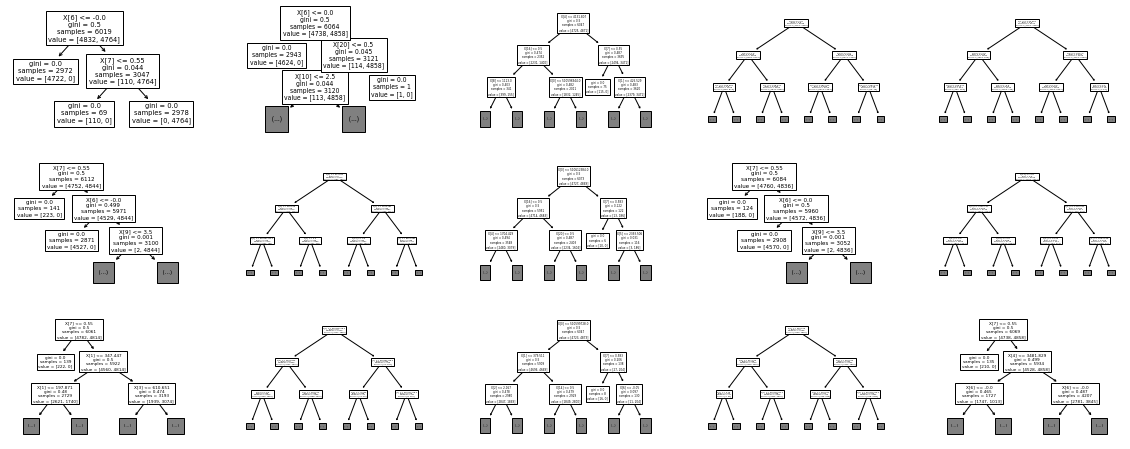

In [32]:
fig, axs= plt.subplots(3,5, figsize=(20,8))
axs= axs.flatten()
for i in range (15):
    tree= model.estimators_[i]
    plot_tree(model.estimators_[i], max_depth=2, ax=axs[i])

In [33]:
trees = np.arange(1,51) #Number of trees
accuracy= np.empty(50) #Matrix for acc

for i in range(50): #Number of models
    model= RandomForestClassifier(n_estimators=trees[i]).fit(X_train, y_train)
    accuracy_values = model.score(X_test, y_test)
    accuracy[i]= accuracy_values

print(accuracy)

[0.94373242 0.97436699 0.99562363 0.99249766 0.99531103 0.99781182
 0.99687402 0.99812441 0.99906221 0.99874961 0.99843701 0.9996874
 0.99874961 0.99843701 0.99843701 0.99874961 0.9996874  0.9993748
 0.99906221 0.99906221 0.9993748  0.99906221 0.99906221 0.99906221
 0.99906221 0.99874961 0.99906221 0.99906221 0.9993748  0.99906221
 0.99906221 0.99874961 0.99906221 0.99906221 0.99906221 0.99906221
 0.99906221 0.99906221 0.99906221 0.99906221 0.99906221 0.99906221
 0.99906221 0.99906221 0.99906221 0.99906221 0.99906221 0.99906221
 0.99906221 0.99906221]


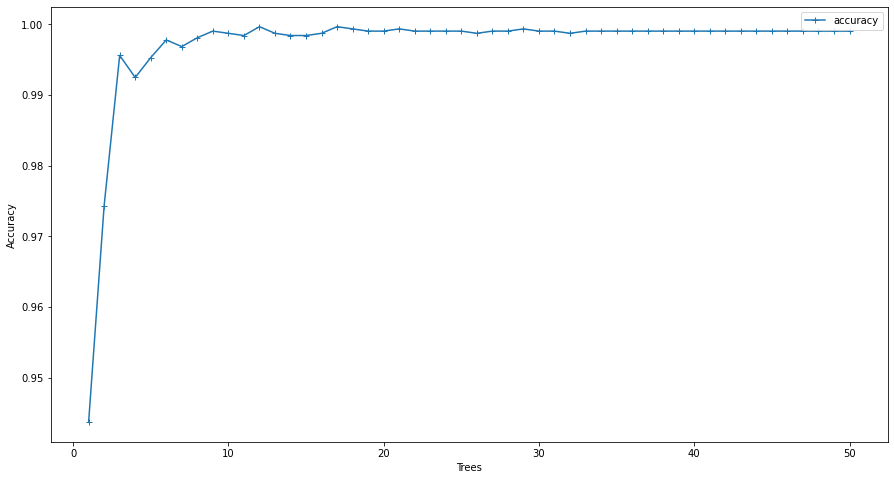

In [34]:
plt.figure(figsize=(15,8))
plt.plot(trees, accuracy, label="accuracy", marker="+")
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend()

In [35]:
accuracy_f= []
features= len(X_train.columns)
r_features= range(1, features)
for i in r_features:
    model=RandomForestClassifier(max_features=i, n_estimators=20).fit(X_train, y_train)
    accuracy_f.append(model.score(X_test, y_test))

In [36]:
accuracy_f

[0.9962488277586746,
 0.997499218505783,
 0.9990622069396686,
 0.9990622069396686,
 0.9990622069396686,
 0.9993748046264458,
 0.9990622069396686,
 0.9990622069396686,
 0.9990622069396686,
 0.9990622069396686,
 0.9990622069396686,
 0.9993748046264458,
 0.9990622069396686,
 0.9990622069396686,
 0.9996874023132228,
 0.9990622069396686,
 0.9990622069396686,
 0.9990622069396686,
 0.9996874023132228,
 0.9993748046264458,
 0.9996874023132228]

In [37]:
params= {"n_estimators": range(30,40,2) ,
        "criterion": ["gini", "entropy"],
         "max_depth": list(range(1,3)) + [None],
         "max_features": ["log2", "sqrt"],
        }
model=RandomForestClassifier()
gs= GridSearchCV(model, params, cv=5, n_jobs=1, verbose=1)
gs.fit(X_train, y_train)
gs.best_score_, gs.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


(0.9998957790515893,
 {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'log2',
  'n_estimators': 32})

In [38]:
lor= LogisticRegression(max_iter=100).fit(X_train, y_train)
lor.score(X_test, y_test)

0.9731165989371678

Hasta este punto la Regresión Logistica es el mejor modelo

In [39]:
y_hat_probs= lor.predict_proba(X_test)[:,1]

In [40]:
y_hat_probs

array([0.92163662, 0.0400965 , 0.45479378, ..., 0.99994626, 0.99999757,
       0.02560539])

In [41]:
threshold = 0.4

In [76]:
y_hatfinal = (y_hat_probs >= threshold).astype(int)

In [77]:
y_hatfinal

array([1, 0, 1, ..., 1, 1, 0])

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


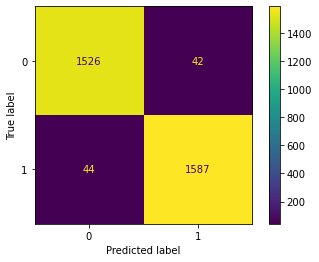

In [44]:
plot_confusion_matrix(lor, X_test, y_test)
plt.show()

In [45]:
fpr, tpr, thr =roc_curve(y_test, y_hat)

In [46]:
auc= roc_auc_score(y_test, y_hat)
auc

0.9744897959183674

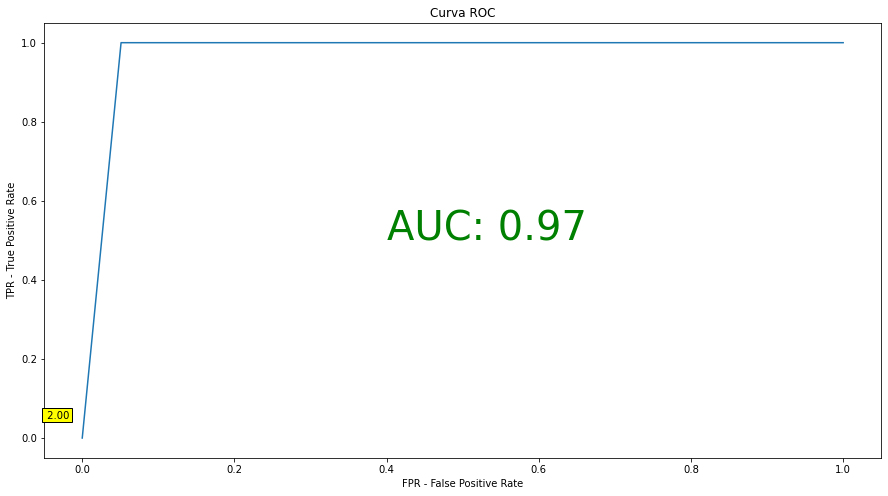

In [47]:
fig, ax= plt.subplots(1,1, figsize=(15,8))
ax.plot(fpr, tpr)
ax.set_title("Curva ROC")
ax.set_xlabel("FPR - False Positive Rate")
ax.set_ylabel("TPR - True Positive Rate")
ax.text(0.4, 0.5, f"AUC:{auc: 0.2f}", c="green", fontdict={"size":40})
for i, (f,t,x) in enumerate (zip(fpr, tpr, thr)):
    if i % 4 == 0:
        ax.text(f-0.05, t+0.05, f"{x: 0.2f}", bbox={"facecolor":"yellow", "pad":2})

In [50]:
numeric_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant")),
    ("encoder", OrdinalEncoder())
])

In [58]:
numeric_f=["VENTAS", "POT_TOTAL", "CREC_POT", "12_meses", "12_meses_AA", "tendencia", "respeto", "autos_promedio", "EDFs actuales", "PUERTAS_EDF"]
categorical_f=[ "SC_Abarrotes / Almacenes / Bodegas / Víveres", "SC_Estanquillos / kioscos", "GRANDE", "EXT-GDE", "MEDIANO", "MICRO", "CHICO", "Estado_EDF_2", "Estado_EDF_8", "Estado_EDF_1", "Estado_EDF_22"]

In [59]:
preprocessor= ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_f)
    ])

In [60]:
pipeline_m= Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LogisticRegression())
])

In [61]:
Model_final= pipeline_m.fit(X_train, y_train)

In [66]:
filename = "finalized_model.sav"
pickle.dump(Model_final, open(filename, "wb"))

In [79]:
dfCooler_Output = pd.DataFrame(y_hatfinal)
dfCooler_Output.head()

,0
0,1
1,0
2,1
3,1
4,1


In [80]:
dfCooler_Output.to_excel('CoolerPrediction.xlsx', sheet_name='coolers', index=False)